In [1]:
import pandas as pd
import numpy as np



import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set_theme(style="darkgrid", context="notebook", font_scale=1.5)

import tensorflow as tf
import keras


2023-11-18 12:06:59.502592: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-18 12:07:00.513687: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
df = pd.read_csv('amz_us_price_prediction_dataset.csv')

In [3]:
df.head()

,uid,asin,title,stars,reviews,price,category,isBestSeller,boughtInLastMonth
0,1,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black...",4.5,0,139.99,Suitcases,False,2000
1,2,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcas...,4.5,0,169.99,Suitcases,False,1000
2,3,B07XSCCZYG,Platinum Elite Softside Expandable Checked Lug...,4.6,0,365.49,Suitcases,False,300
3,4,B08MVFKGJM,Freeform Hardside Expandable with Double Spinn...,4.6,0,291.59,Suitcases,False,400
4,5,B01DJLKZBA,Winfield 2 Hardside Expandable Luggage with Sp...,4.5,0,174.99,Suitcases,False,400


In [4]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
category              object
isBestSeller            bool
boughtInLastMonth      int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1735414 entries, 0 to 1735413
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   category           object 
 7   isBestSeller       bool   
 8   boughtInLastMonth  int64  
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 107.6+ MB


In [6]:
df.shape

(1735414, 9)

In [7]:
df.size

15618726

### Data Cleaning

In [8]:
df.isnull().sum()

uid                  0
asin                 0
title                1
stars                0
reviews              0
price                0
category             0
isBestSeller         0
boughtInLastMonth    0
dtype: int64

In [9]:
df.duplicated().sum()

0

### EDA

In [10]:
df['category'].value_counts().count()

236

In [11]:
mask = df[df['isBestSeller'] == True]

In [12]:
mask = mask['category'].value_counts().nlargest(5)
mask = pd.DataFrame(mask)
mask


,count
category,
Sports & Outdoors,819
Tools & Home Improvement,729
Industrial & Scientific,666
Sports & Fitness,564
Kitchen & Dining,488


Text(0, 0.5, 'Items')

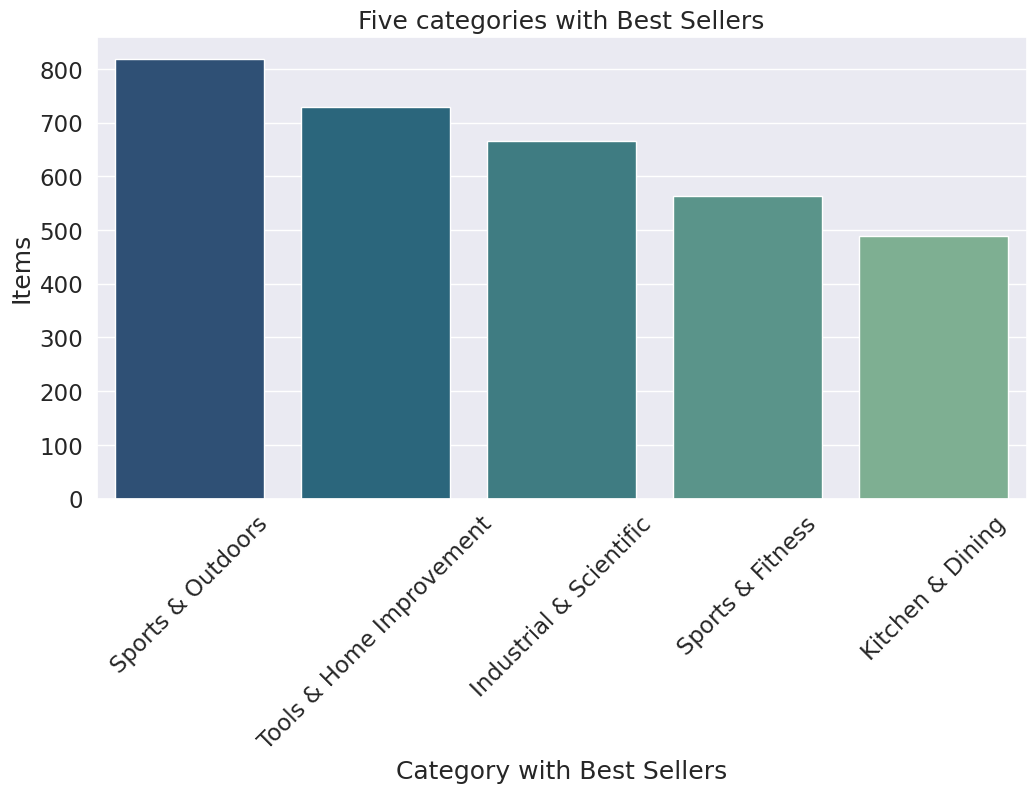

In [13]:
plt.figure(figsize=(12,6))
sns.barplot(x=mask.index, y=mask['count'], palette="crest_r")
plt.title('Five categories with Best Sellers')
plt.xticks(rotation=45)
plt.xlabel('Category with Best Sellers')
plt.ylabel('Items')

In [14]:
category = df.category.value_counts().nlargest(5)
category = pd.DataFrame(category)

Text(0, 0.5, 'Itens selled')

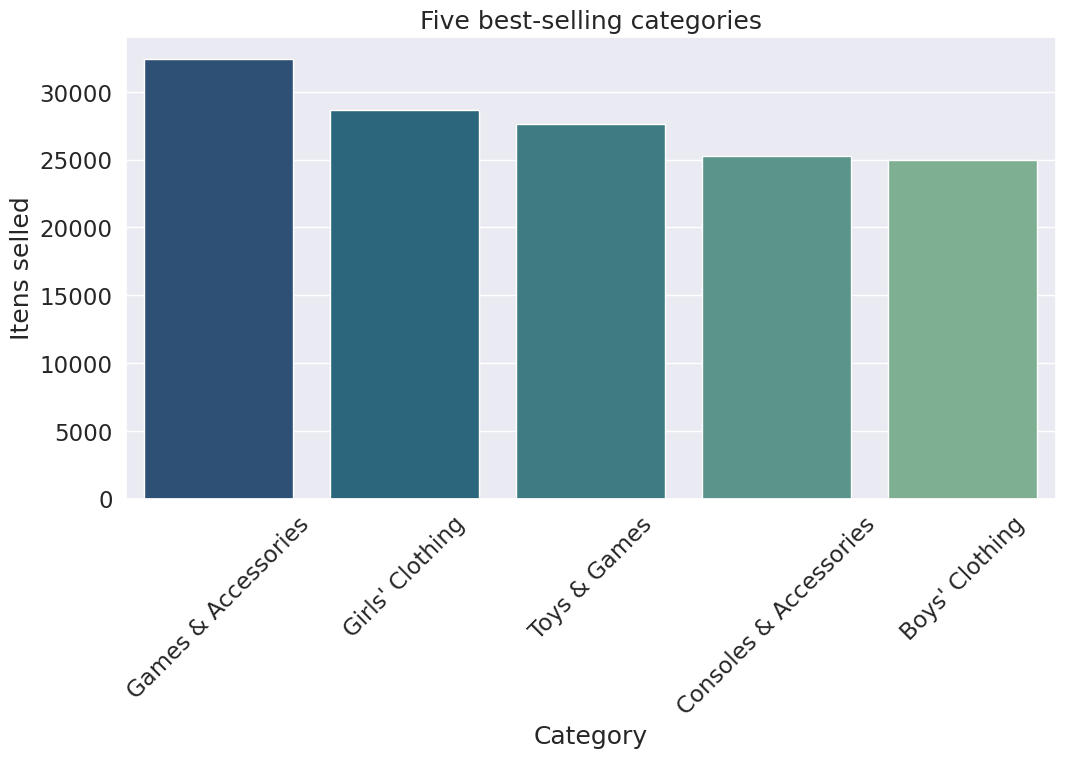

In [15]:
plt.figure(figsize=(12,6))
sns.barplot(x=category.index, y=category['count'], palette="crest_r")
plt.title('Five best-selling categories')
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Itens selled')

In [16]:
stars = df.groupby('category')['stars'].mean().nlargest(5)
stars = pd.DataFrame(stars)
stars

,stars
category,
Gift Cards,4.832374
Kitchen & Dining,4.556086
Food Service Equipment & Supplies,4.543653
Industrial & Scientific,4.539780
Power Tools & Hand Tools,4.526788


Text(0, 0.5, 'Rating')

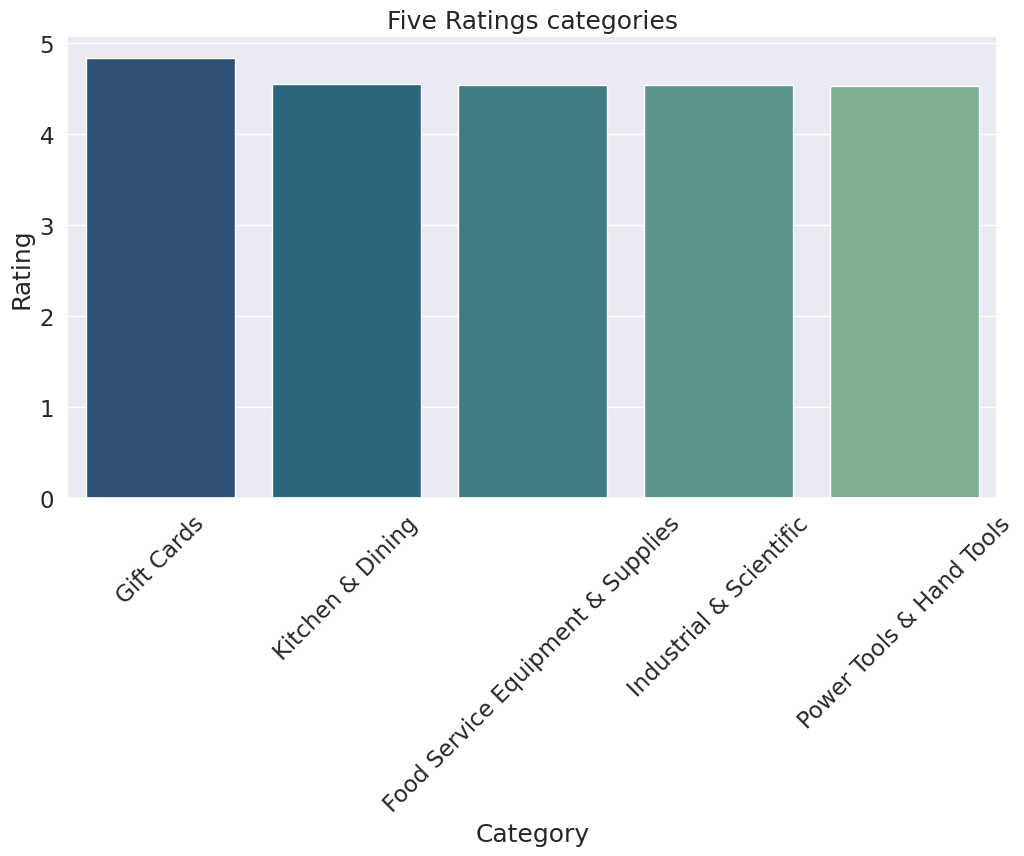

In [17]:
plt.figure(figsize=(12,6))
sns.barplot(x=stars.index, y=stars['stars'], palette="crest_r")
plt.title('Five Ratings categories')
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Rating')

Text(0, 0.5, 'Price')

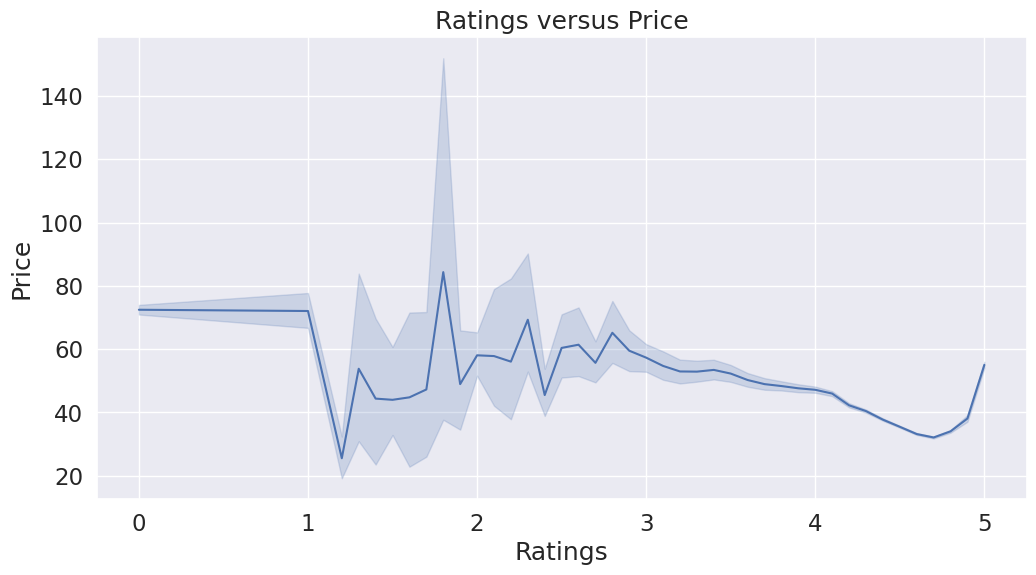

In [18]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df['stars'], y=df['price'], palette="flare")
plt.title('Ratings versus Price')
plt.xlabel('Ratings')
plt.ylabel('Price')

Text(0, 0.5, 'Sold')

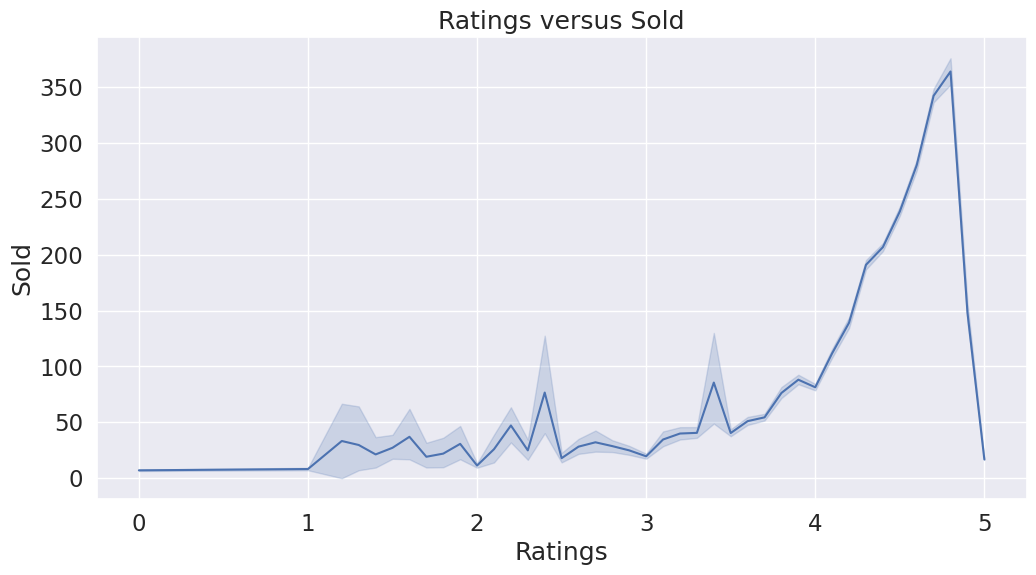

In [19]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df['stars'], y=df['boughtInLastMonth'], palette="flare")
plt.title('Ratings versus Sold')
plt.xlabel('Ratings')
plt.ylabel('Sold')

Text(0, 0.5, 'Number of Reviews')

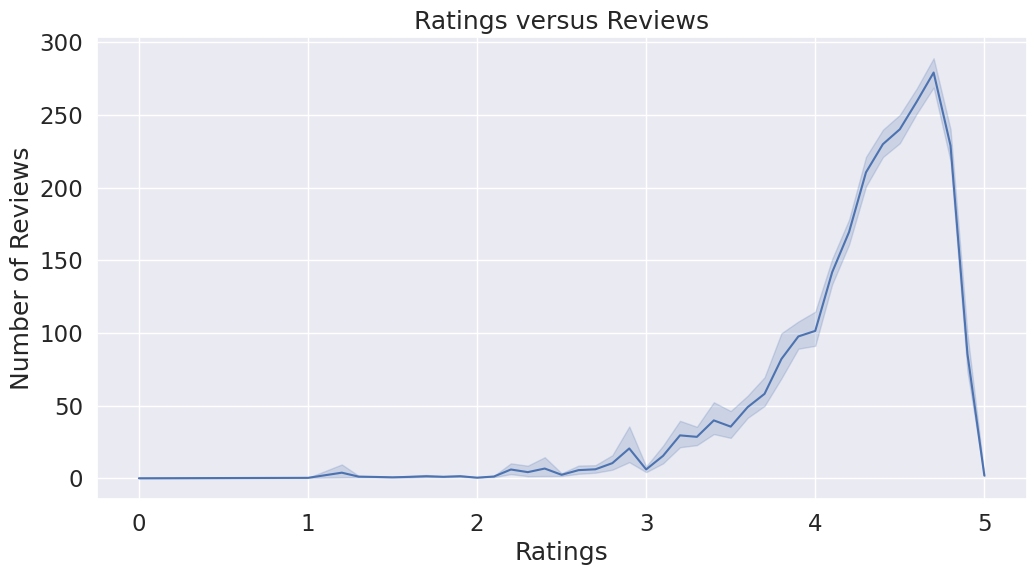

In [20]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df['stars'], y=df['reviews'], palette="flare")
plt.title('Ratings versus Reviews')
plt.xlabel('Ratings')
plt.ylabel('Number of Reviews')

Text(0, 0.5, 'Price')

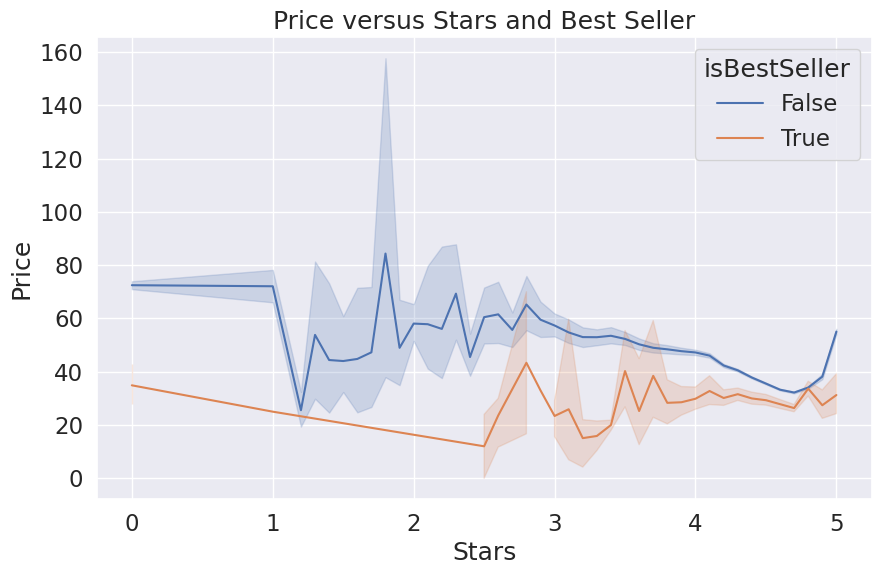

In [21]:
plt.figure(figsize=(10,6))
sns.lineplot(x=df['stars'], y=df['price'], hue=df['isBestSeller'])
plt.title('Price versus Stars and Best Seller')
plt.xlabel('Stars')
plt.ylabel('Price')


Text(0, 0.5, 'Price')

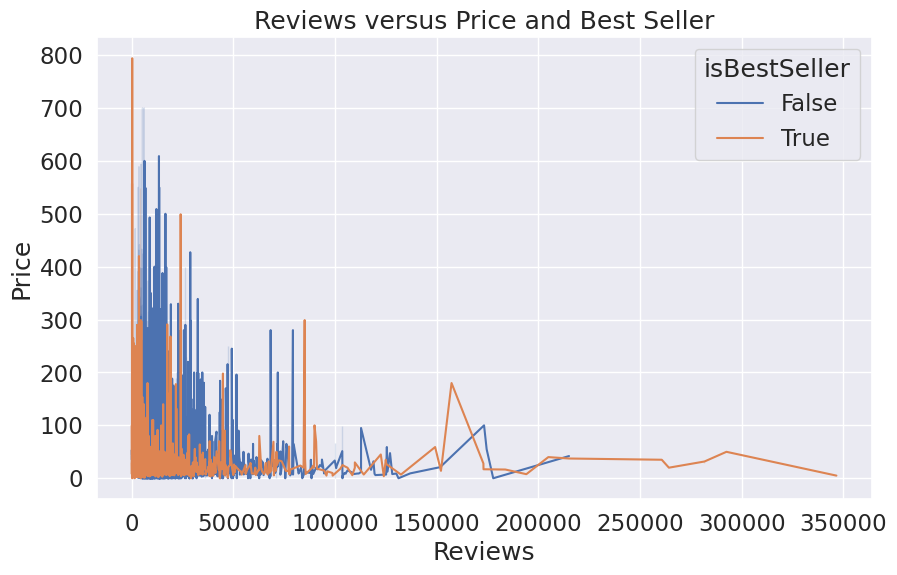

In [22]:
plt.figure(figsize=(10,6))
sns.lineplot(x=df['reviews'], y=df['price'], hue=df['isBestSeller'])
plt.title('Reviews versus Price and Best Seller')
plt.xlabel('Reviews')
plt.ylabel('Price')


Text(0, 0.5, 'Price')

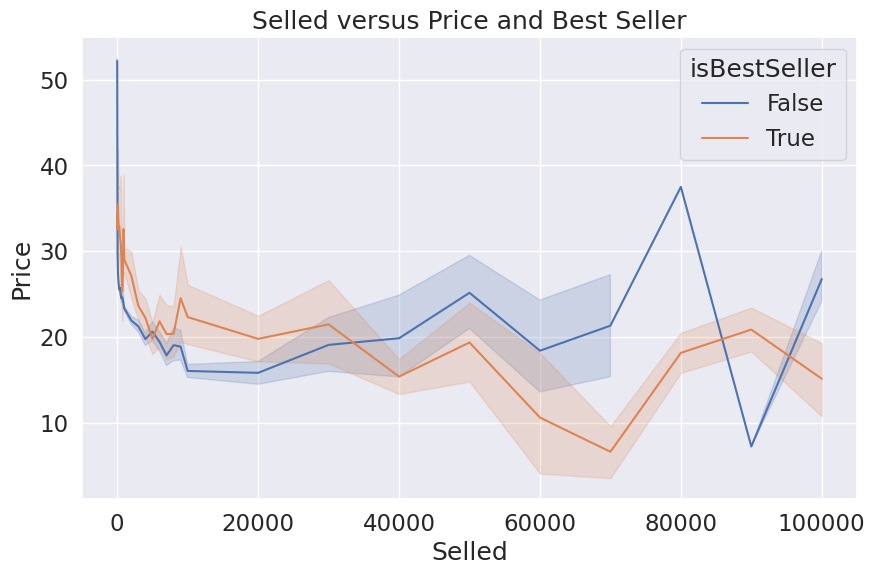

In [23]:
plt.figure(figsize=(10,6))
sns.lineplot(x=df['boughtInLastMonth'], y=df['price'], hue=df['isBestSeller'])
plt.title('Selled versus Price and Best Seller')
plt.xlabel('Selled')
plt.ylabel('Price')


In [24]:
round(df.describe(),2)

,uid,stars,reviews,price,boughtInLastMonth
count,1735414.00,1735414.00,1735414.00,1735414.00,1735414.00
mean,1113750.14,4.05,177.28,42.20,190.80
std,635129.01,1.28,1774.47,124.98,995.24
min,1.00,0.00,0.00,0.00,0.00
25%,594702.25,4.20,0.00,11.99,0.00
50%,1091739.50,4.50,0.00,19.89,0.00
75%,1651765.75,4.70,0.00,35.00,100.00
max,2243235.00,5.00,346563.00,19731.81,100000.00


In [25]:
df.corr(numeric_only=True)

,uid,stars,reviews,price,isBestSeller,boughtInLastMonth
uid,1.000000,0.031012,-0.063953,-0.038851,0.013514,0.025734
stars,0.031012,1.000000,0.034028,-0.077774,0.030900,0.068291
reviews,-0.063953,0.034028,1.000000,-0.009679,0.086123,0.131883
price,-0.038851,-0.077774,-0.009679,1.000000,-0.009121,-0.030019
isBestSeller,0.013514,0.030900,0.086123,-0.009121,1.000000,0.190959
boughtInLastMonth,0.025734,0.068291,0.131883,-0.030019,0.190959,1.000000


In [26]:
df.dropna(axis=0, inplace=True)

In [27]:
data = df.copy()

In [28]:
data.drop(columns=['asin', 'title'], inplace=True)

In [29]:
data.drop(columns=['uid'], inplace=True)

In [30]:
data = pd.get_dummies(data, columns=['category'], dtype=int)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1735413 entries, 0 to 1735413
Columns: 241 entries, stars to category_eBook Readers & Accessories
dtypes: bool(1), float64(2), int64(238)
memory usage: 3.1 GB


In [32]:
data

,stars,reviews,price,isBestSeller,boughtInLastMonth,category_Abrasive & Finishing Products,category_Accessories & Supplies,category_Additive Manufacturing Products,category_Arts & Crafts Supplies,category_Arts Crafts & Sewing Storage,...,category_Wearable Technology,category_Welding & Soldering,category_Wellness & Relaxation Products,category_Women's Accessories,category_Women's Clothing,category_Women's Handbags,category_Women's Jewelry,category_Women's Shoes,category_Women's Watches,category_eBook Readers & Accessories
0,4.5,0,139.99,False,2000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.5,0,169.99,False,1000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.6,0,365.49,False,300,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.6,0,291.59,False,400,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.5,0,174.99,False,400,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1735409,4.4,0,33.99,False,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1735410,3.6,0,8.54,False,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1735411,4.5,0,54.36,False,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1735412,4.9,0,18.79,False,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
train = data.sample(frac=0.7, random_state=0)
test = data.drop(train.index)
val = test.sample(frac=0.33, random_state=0)
test = test.drop(val.index)

In [34]:
print('Shape of train: ', train.shape)
print('Shape of test: ', test.shape)
print('Shape of validation: ', val.shape)

Shape of train:  (1214789, 241)
Shape of test:  (348818, 241)
Shape of validation:  (171806, 241)


In [35]:
X_train = train.copy()
X_train = X_train.drop(columns=['price'])
X_test = test.copy()
X_test = X_test.drop(columns=['price'])
X_val = val.copy()
X_val = X_val.drop(columns=['price'])
y_train = train['price']
y_test = test['price']
y_val = val['price']



In [36]:
X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_test.mean()) / X_test.std()
X_val = (X_val - X_val.mean()) / X_val.std()
y_train = (y_train - y_train.mean()) / y_train.std()
y_test = (y_test - y_test.mean()) / y_test.std()
y_val = (y_val - y_val.mean()) / y_val.std()

### Model

In [37]:
model = tf.keras.models.Sequential([
    keras.layers.Dense(1024, activation='relu', input_shape=[240]),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(1)
])

2023-11-18 12:10:23.143958: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-18 12:10:23.470651: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-18 12:10:23.471249: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [38]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mse', metrics=['mae'])

In [39]:
model.build()

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              246784    
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 903169 (3.45 MB)
Trainable params: 903169 (3.45 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
history = model.fit(X_train, y_train, epochs=50, validation_data=[X_val, y_val], verbose=1)

2023-11-18 14:58:57.802620: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 2332394880 exceeds 10% of free system memory.


Epoch 1/50
37963/37963 [==============================] - 89s 2ms/step - loss: 1.0008 - mae: 0.3129 - val_loss: 1.0001 - val_mae: 0.3329
Epoch 2/50
37963/37963 [==============================] - 81s 2ms/step - loss: 1.0009 - mae: 0.3130 - val_loss: 1.0002 - val_mae: 0.3361
Epoch 3/50
37963/37963 [==============================] - 81s 2ms/step - loss: 1.0008 - mae: 0.3130 - val_loss: 1.0002 - val_mae: 0.3194
Epoch 4/50
37963/37963 [==============================] - 82s 2ms/step - loss: 1.0008 - mae: 0.3129 - val_loss: 1.0007 - val_mae: 0.3115
Epoch 5/50
37963/37963 [==============================] - 79s 2ms/step - loss: 1.0009 - mae: 0.3130 - val_loss: 1.0010 - val_mae: 0.3472
Epoch 6/50
37963/37963 [==============================] - 79s 2ms/step - loss: 1.0008 - mae: 0.3130 - val_loss: 1.0000 - val_mae: 0.3231
Epoch 7/50
37963/37963 [==============================] - 78s 2ms/step - loss: 1.0009 - mae: 0.3129 - val_loss: 1.0002 - val_mae: 0.3194
Epoch 8/50
37963/37963 [=================

In [48]:
def plot_loss():
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

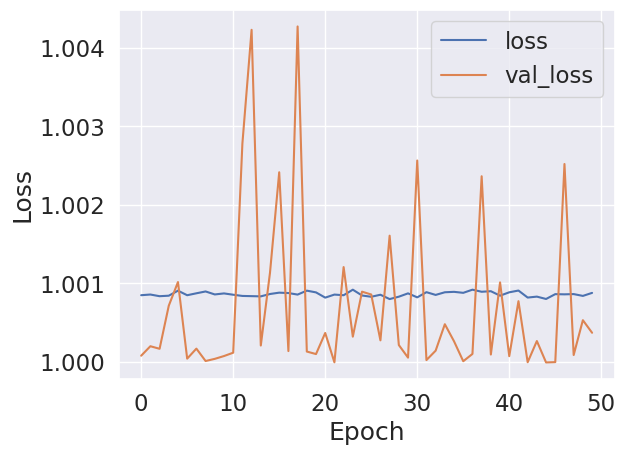

In [49]:
plot_loss()